<a href="https://colab.research.google.com/github/MathewLipman/Work-Samples/blob/main/Search_Advertising_Chart_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generating random dataset 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



import numpy as np
import pandas as pd

np.random.seed(0)  # For reproducibility

keywords = ['Keyword_' + str(i) for i in range(1, 51)]
locations = ['USA', 'Canada', 'UK']
devices = ['Mobile', 'Desktop', 'Tablet']

sem_data = {
    "Keyword": np.random.choice(keywords, size=1000),
    "Location": np.random.choice(locations, size=1000),
    "Device": np.random.choice(devices, size=1000),
    "Impressions": np.random.randint(500, 10000, size=1000),
    "Clicks": np.random.randint(50, 500, size=1000),
    "Conversions": np.random.randint(1, 100, size=1000),
    "CPC": np.random.uniform(0.5, 20, size=1000)
}

sem_df = pd.DataFrame(sem_data)

# Calculate CTR and Conversion Rate
sem_df['CTR'] = sem_df['Clicks'] / sem_df['Impressions']
sem_df['Conversion Rate'] = sem_df['Conversions'] / sem_df['Clicks']

# Calculate Cost based on Impressions and Clicks
sem_df['Cost'] = sem_df['Clicks'] * sem_df['CPC']


# Function to generate random dates
def random_dates(start, end, n=10):
    start_u = start.value//10**9
    end_u = end.value//10**9
    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')

# Start and end date
start = pd.to_datetime('2022-01-01')
end = pd.to_datetime('2022-12-31')

# Add date column
sem_df['Date'] = random_dates(start, end, sem_df.shape[0])

# Sort by date
sem_df.sort_values('Date', inplace=True)




# Print the dataframe
print(sem_df.head())





        Keyword Location   Device  Impressions  Clicks  Conversions  \
54    Keyword_1      USA   Tablet          605     345           65   
201  Keyword_16       UK   Tablet         3180     367           88   
266  Keyword_45      USA   Mobile         7969     217           79   
249  Keyword_10      USA  Desktop         7267     205           27   
973  Keyword_34   Canada   Mobile         6173     343           59   

           CPC       CTR  Conversion Rate         Cost                Date  
54   12.512759  0.570248         0.188406  4316.901914 2022-01-01 15:29:32  
201  18.806060  0.115409         0.239782  6901.824037 2022-01-02 08:02:29  
266  16.899370  0.027231         0.364055  3667.163335 2022-01-03 04:07:01  
249   9.129272  0.028210         0.131707  1871.500797 2022-01-03 06:53:56  
973   9.520293  0.055565         0.172012  3265.460545 2022-01-03 07:29:30  


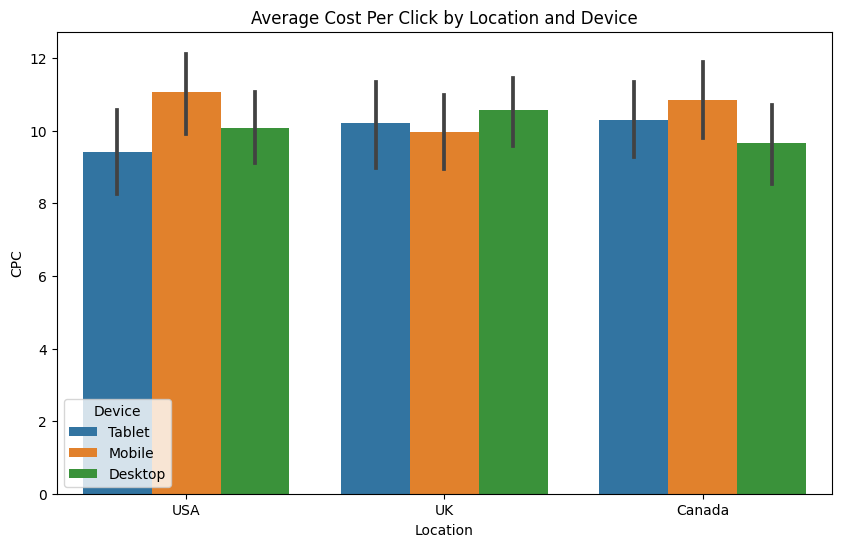

In [ ]:
# Calculate average CPC
sem_df['CPC'] = sem_df['Cost'] / sem_df['Clicks']

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Location', y='CPC', hue='Device', data=sem_df)
plt.title('Average Cost Per Click by Location and Device')
plt.show()


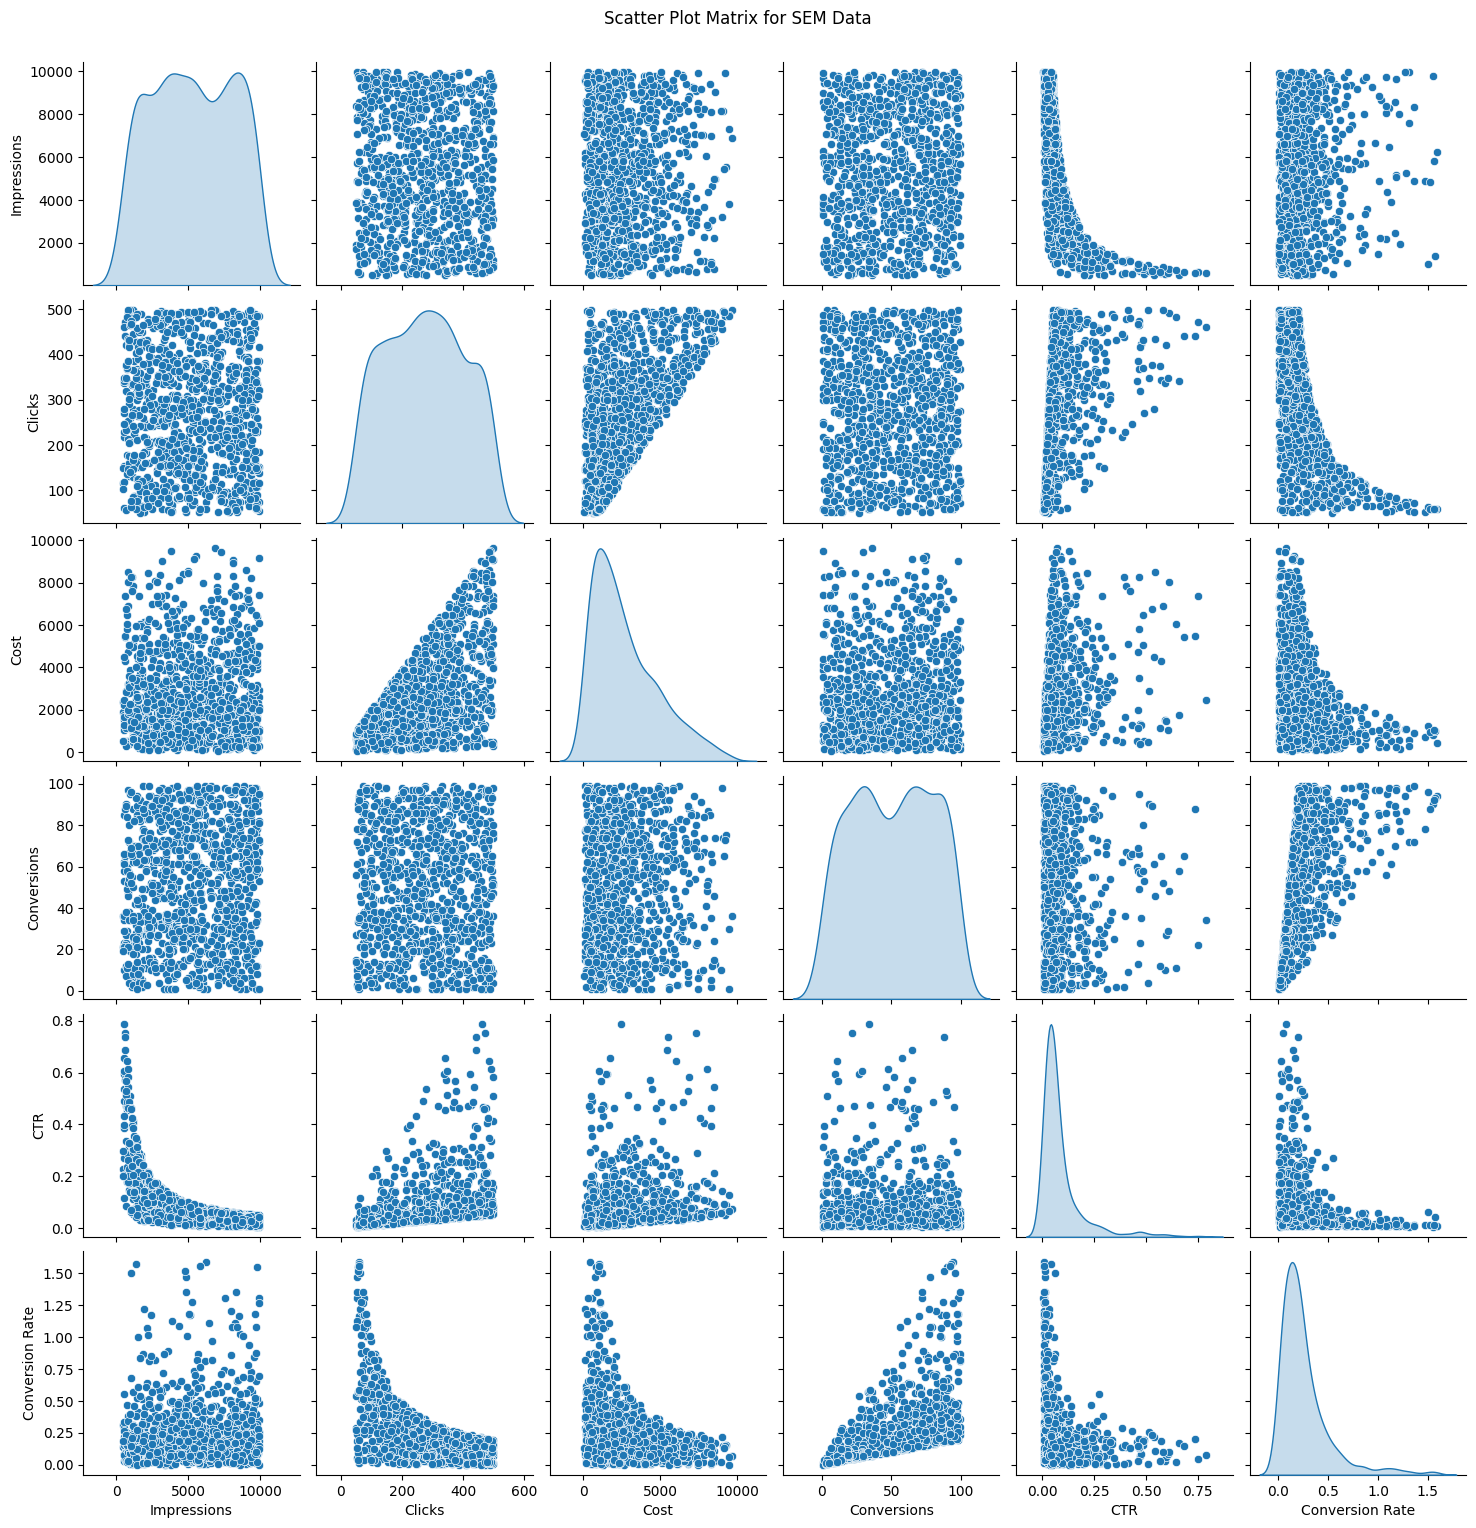

In [ ]:
# Create a scatter plot matrix
sns.pairplot(sem_df[['Impressions', 'Clicks', 'Cost', 'Conversions', 'CTR', 'Conversion Rate']], diag_kind='kde')
plt.suptitle('Scatter Plot Matrix for SEM Data', y=1.02)
plt.show()


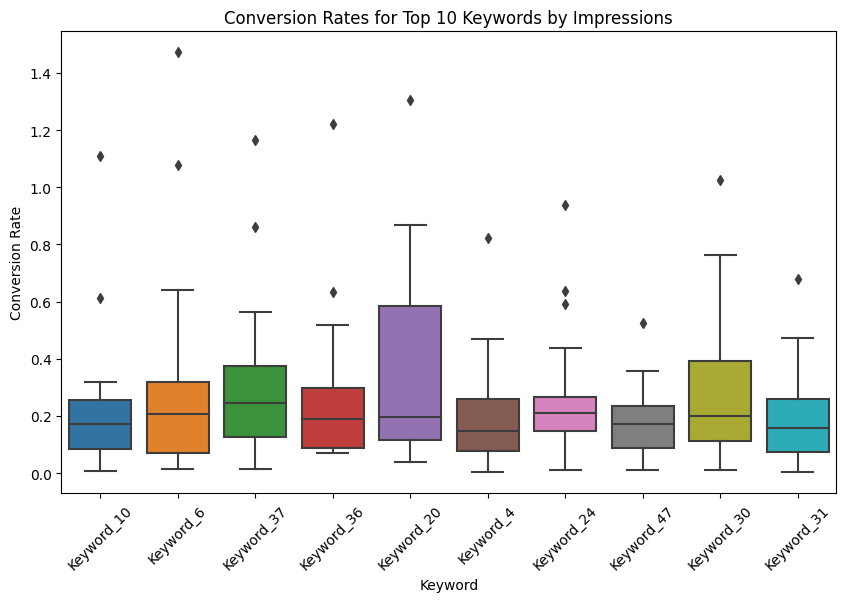

In [ ]:
# Top 10 keywords by Impressions
top_keywords = sem_df.groupby('Keyword')['Impressions'].sum().nlargest(10).index

# Filter dataframe for top keywords
top_keywords_df = sem_df[sem_df['Keyword'].isin(top_keywords)]

# Plot
plt.figure(figsize=(10,6))
sns.boxplot(x='Keyword', y='Conversion Rate', data=top_keywords_df)
plt.title('Conversion Rates for Top 10 Keywords by Impressions')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Add Ad Version to our data
ad_versions = ['Version_A', 'Version_B']
sem_df['Ad Version'] = np.random.choice(ad_versions, size=1000)


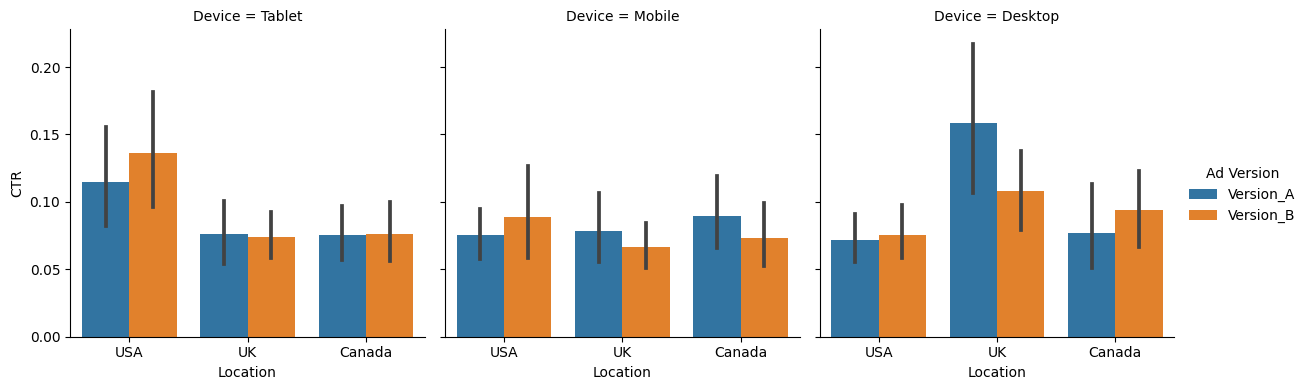

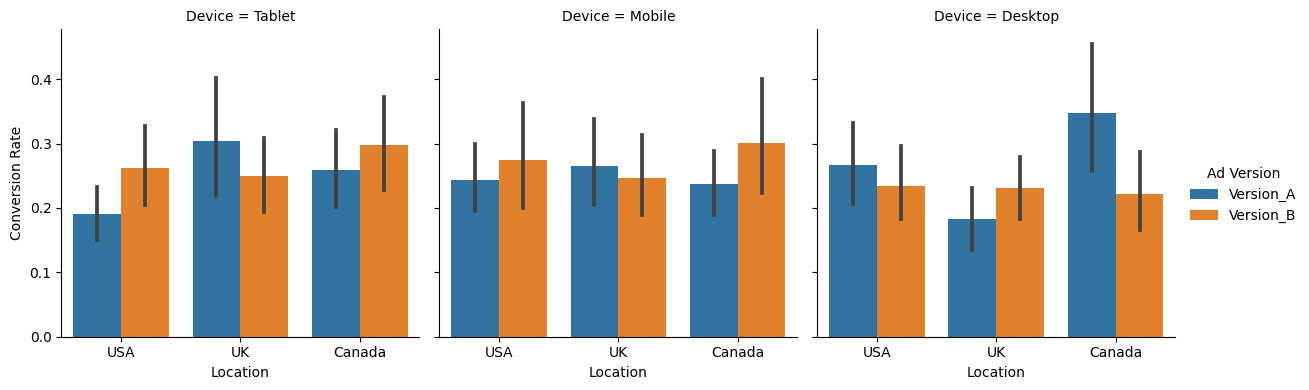

In [ ]:
# Create a combined bar plot
sns.catplot(
    x='Location', 
    y='CTR', 
    hue='Ad Version', 
    col='Device', 
    data=sem_df, 
    kind='bar', 
    height=4, 
    aspect=1
)

sns.catplot(
    x='Location', 
    y='Conversion Rate', 
    hue='Ad Version', 
    col='Device', 
    data=sem_df, 
    kind='bar', 
    height=4, 
    aspect=1
)
plt.show()


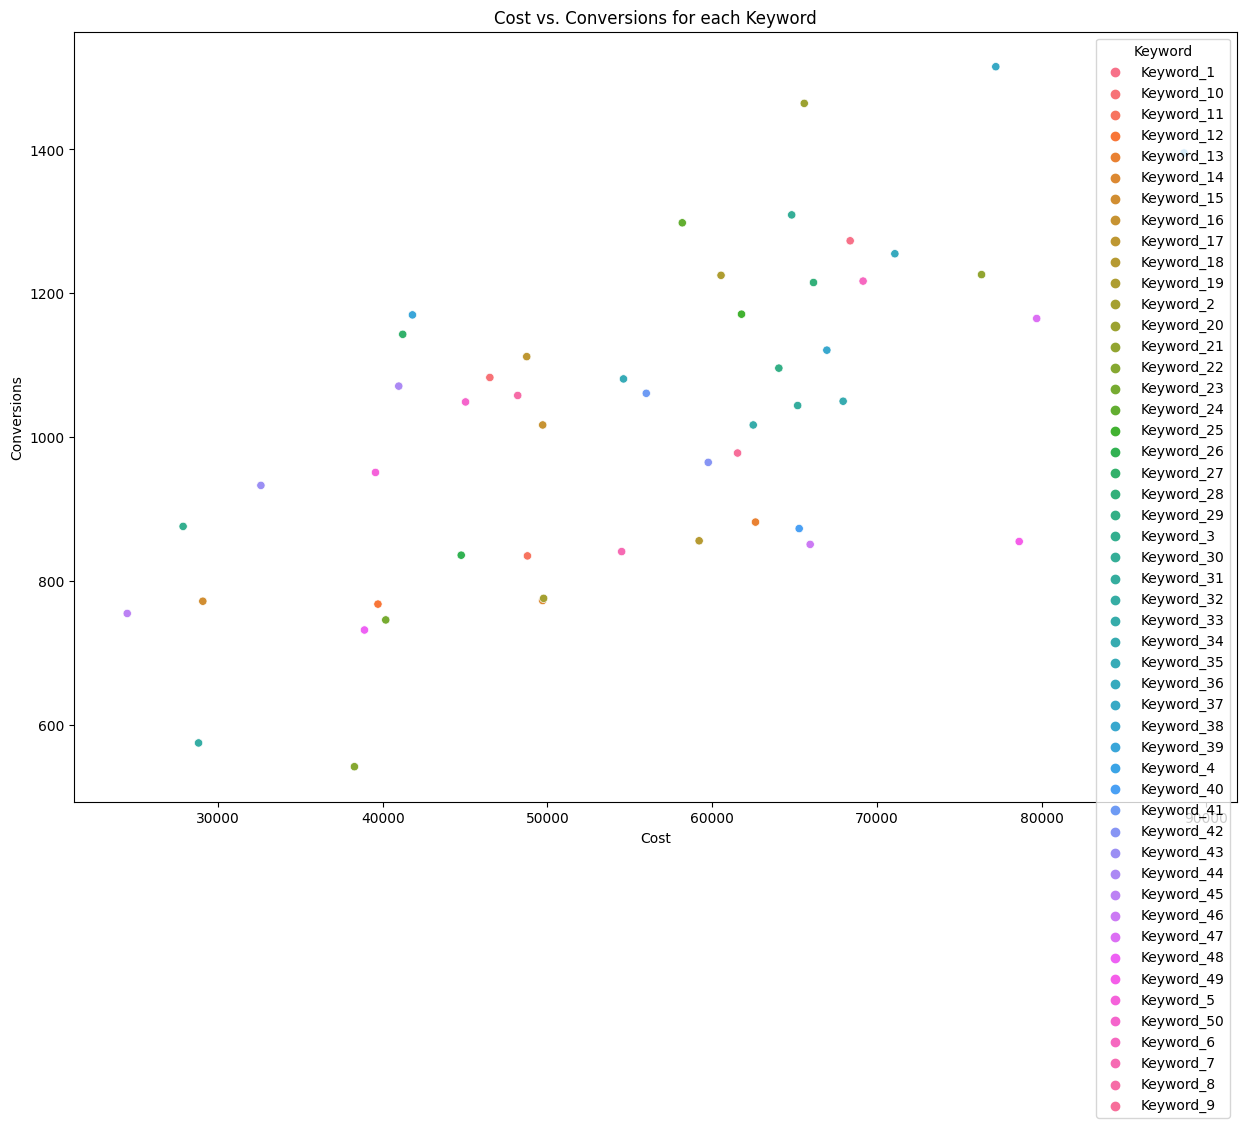

In [ ]:
# Aggregate Cost and Conversions by Keyword
keyword_performance = sem_df.groupby('Keyword')[['Cost', 'Conversions']].sum().reset_index()

# Create scatter plot
plt.figure(figsize=(15,10))
sns.scatterplot(x='Cost', y='Conversions', hue='Keyword', data=keyword_performance)
plt.title('Cost vs. Conversions for each Keyword')
plt.show()


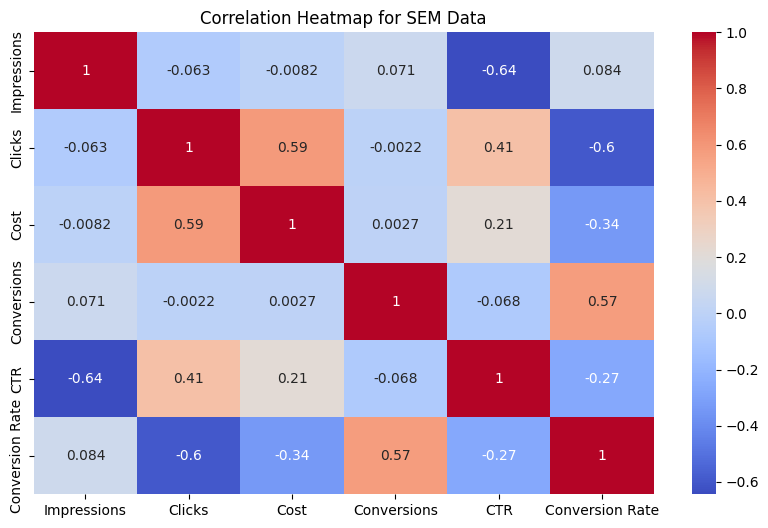

In [ ]:
# Compute correlations
correlations = sem_df[['Impressions', 'Clicks', 'Cost', 'Conversions', 'CTR', 'Conversion Rate']].corr()

# Create a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for SEM Data')
plt.show()


In [ ]:
# Generate a report for the latest data
latest_df = sem_df[sem_df['Date'] == sem_df['Date'].max()]

# 1. Total Cost, Impressions, Clicks, Conversions
total_metrics = latest_df[['Cost', 'Impressions', 'Clicks', 'Conversions']].sum()
print(f"Total Metrics for {sem_df['Date'].max()}")
print(total_metrics)

# 2. CTR, CPC, Conversion Rate by Location
location_metrics = latest_df.groupby('Location')[['CTR', 'CPC', 'Conversion Rate']].mean()
print("\nAverage CTR, CPC, Conversion Rate by Location")
print(location_metrics)

# 3. Top 10 Keywords by Impressions
top_keywords = latest_df.groupby('Keyword')['Impressions'].sum().nlargest(10)
print("\nTop 10 Keywords by Impressions")
print(top_keywords)

# 4. Number of Clicks by Device
device_clicks = latest_df.groupby('Device')['Clicks'].sum()
print("\nNumber of Clicks by Device")
print(device_clicks)

# 5. Conversion Rate by Ad Version
ad_version_conversion_rate = latest_df.groupby('Ad Version')['Conversion Rate'].mean()
print("\nConversion Rate by Ad Version")
print(ad_version_conversion_rate)


Total Metrics for 2022-12-30 20:18:55
Cost           1439.535962
Impressions    1281.000000
Clicks          178.000000
Conversions      82.000000
dtype: float64

Average CTR, CPC, Conversion Rate by Location
               CTR       CPC  Conversion Rate
Location                                     
USA       0.138954  8.087281         0.460674

Top 10 Keywords by Impressions
Keyword
Keyword_50    1281
Name: Impressions, dtype: int64

Number of Clicks by Device
Device
Desktop    178
Name: Clicks, dtype: int64

Conversion Rate by Ad Version
Ad Version
Version_A    0.460674
Name: Conversion Rate, dtype: float64


In [ ]:
# Generate a report for the latest data
latest_df = sem_df[sem_df['Date'] == sem_df['Date'].max()]

# 1. Total Cost, Impressions, Clicks, Conversions
total_metrics = latest_df[['Cost', 'Impressions', 'Clicks', 'Conversions']].sum()
print(f"Total Metrics for {sem_df['Date'].max()}")
print(total_metrics)

# 2. CTR, CPC, Conversion Rate by Location
location_metrics = latest_df.groupby('Location')[['CTR', 'CPC', 'Conversion Rate']].mean()
print("\nAverage CTR, CPC, Conversion Rate by Location")
print(location_metrics)

# 3. Top 10 Keywords by Impressions
top_keywords = latest_df.groupby('Keyword')['Impressions'].sum().nlargest(10)
print("\nTop 10 Keywords by Impressions")
print(top_keywords)

# 4. Number of Clicks by Device
device_clicks = latest_df.groupby('Device')['Clicks'].sum()
print("\nNumber of Clicks by Device")
print(device_clicks)

# 5. Conversion Rate by Ad Version
ad_version_conversion_rate = latest_df.groupby('Ad Version')['Conversion Rate'].mean()
print("\nConversion Rate by Ad Version")
print(ad_version_conversion_rate)


Total Metrics for 2022-12-30 20:18:55
Cost           1439.535962
Impressions    1281.000000
Clicks          178.000000
Conversions      82.000000
dtype: float64

Average CTR, CPC, Conversion Rate by Location
               CTR       CPC  Conversion Rate
Location                                     
USA       0.138954  8.087281         0.460674

Top 10 Keywords by Impressions
Keyword
Keyword_50    1281
Name: Impressions, dtype: int64

Number of Clicks by Device
Device
Desktop    178
Name: Clicks, dtype: int64

Conversion Rate by Ad Version
Ad Version
Version_A    0.460674
Name: Conversion Rate, dtype: float64


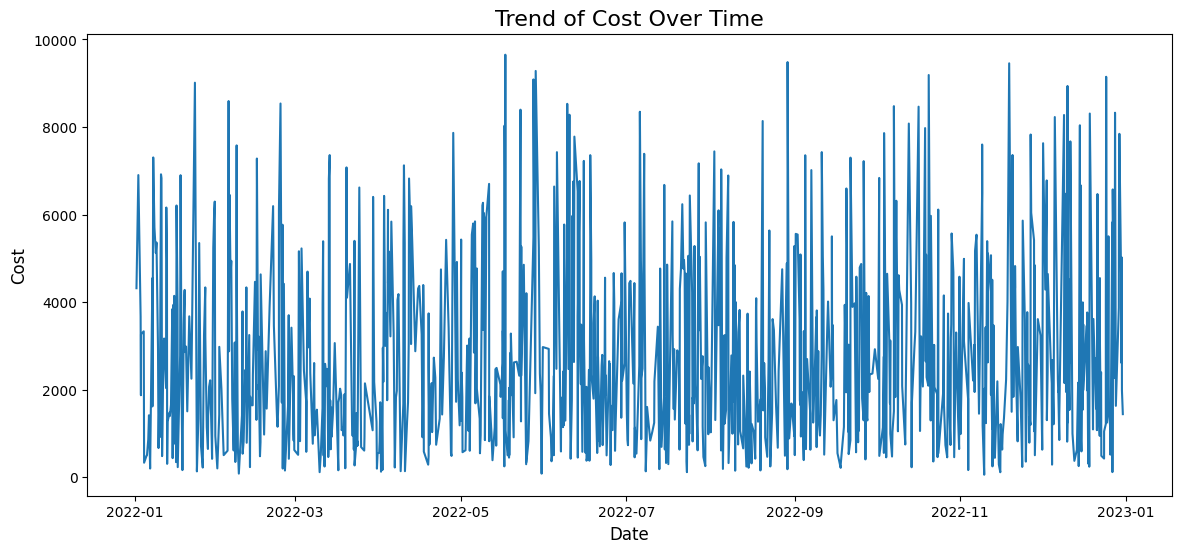

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(14, 6))

# Time series plot of cost over time
sns.lineplot(x="Date", y="Cost", data=sem_df)

# Set the title and labels
plt.title("Trend of Cost Over Time", size=16)
plt.xlabel("Date", size=12)
plt.ylabel("Cost", size=12)

# Display the plot
plt.show()


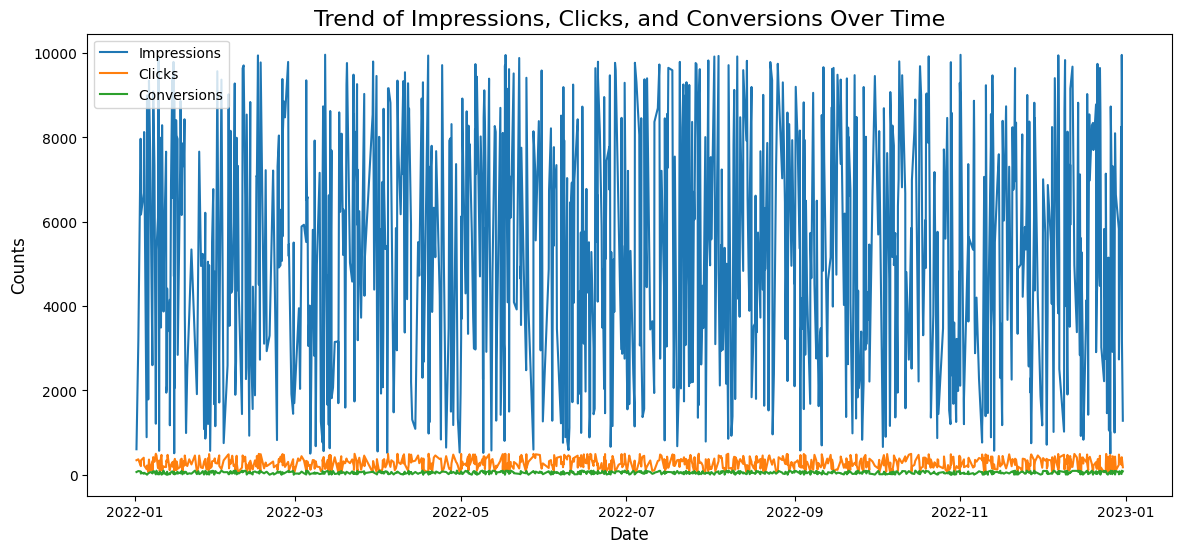

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 6))

# Time series plot of impressions, clicks, and conversions over time
sns.lineplot(x="Date", y="Impressions", data=sem_df, label='Impressions')
sns.lineplot(x="Date", y="Clicks", data=sem_df, label='Clicks')
sns.lineplot(x="Date", y="Conversions", data=sem_df, label='Conversions')

# Set the title and labels
plt.title("Trend of Impressions, Clicks, and Conversions Over Time", size=16)
plt.xlabel("Date", size=12)
plt.ylabel("Counts", size=12)

# Display the legend and plot
plt.legend()
plt.show()




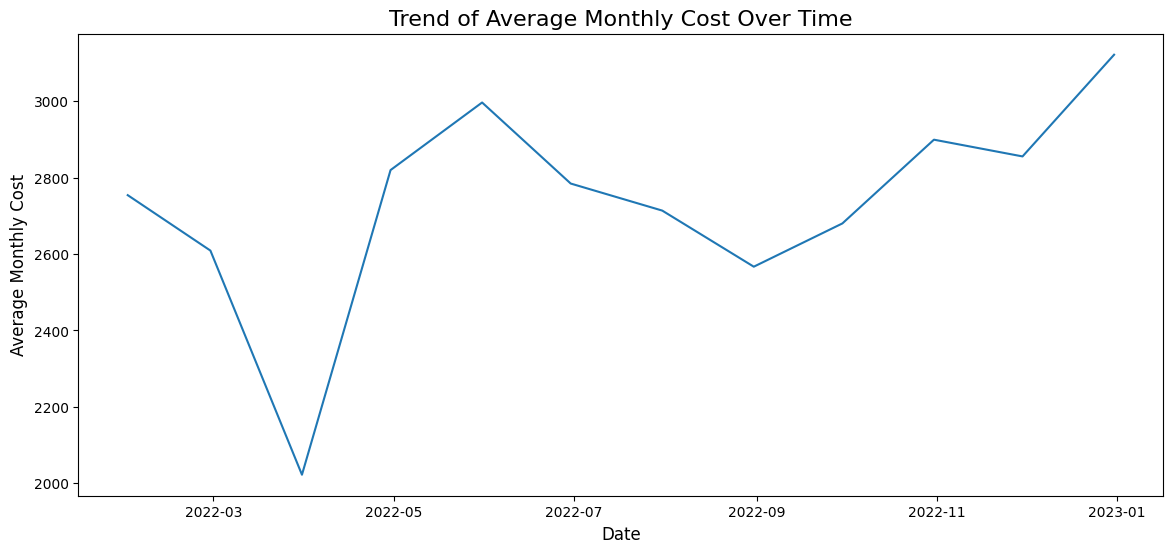

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Resample the data by month and compute the mean
sem_df_monthly = sem_df.resample('M', on='Date').mean()

# Set the figure size
plt.figure(figsize=(14, 6))

# Time series plot of average monthly cost over time
sns.lineplot(x="Date", y="Cost", data=sem_df_monthly)

# Set the title and labels
plt.title("Trend of Average Monthly Cost Over Time", size=16)
plt.xlabel("Date", size=12)
plt.ylabel("Average Monthly Cost", size=12)

# Display the plot
plt.show()


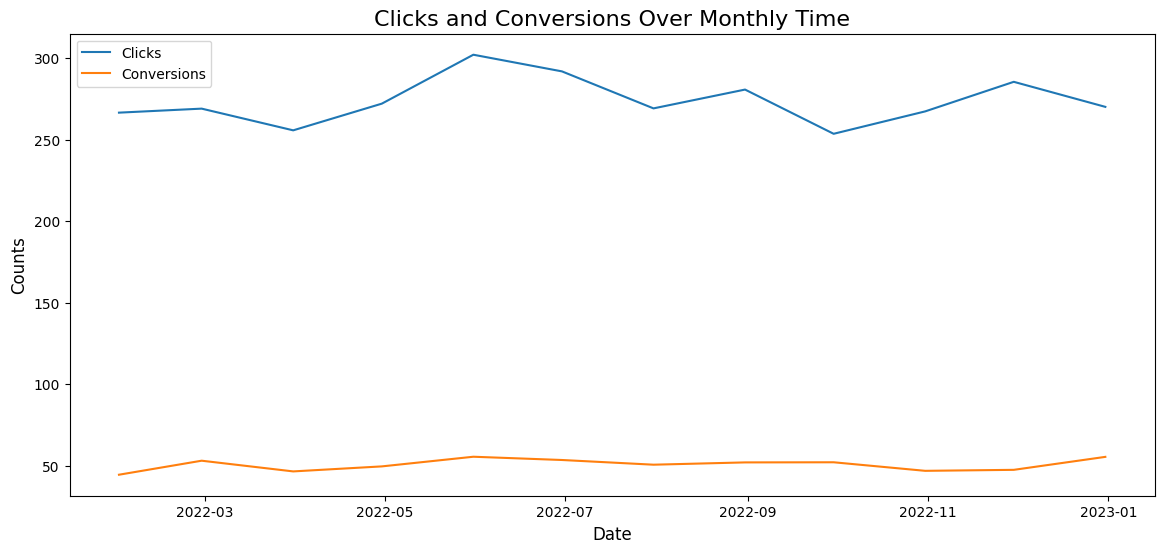

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 6))

# Time series plot of impressions, clicks, and conversions over time
sns.lineplot(x="Date", y="Clicks", data=sem_df_monthly, label='Clicks')
sns.lineplot(x="Date", y="Conversions", data=sem_df_monthly, label='Conversions')

# Set the title and labels
plt.title("Clicks and Conversions Over Monthly Time", size=16)
plt.xlabel("Date", size=12)
plt.ylabel("Counts", size=12)

# Display the legend and plot
plt.legend()
plt.show()
 



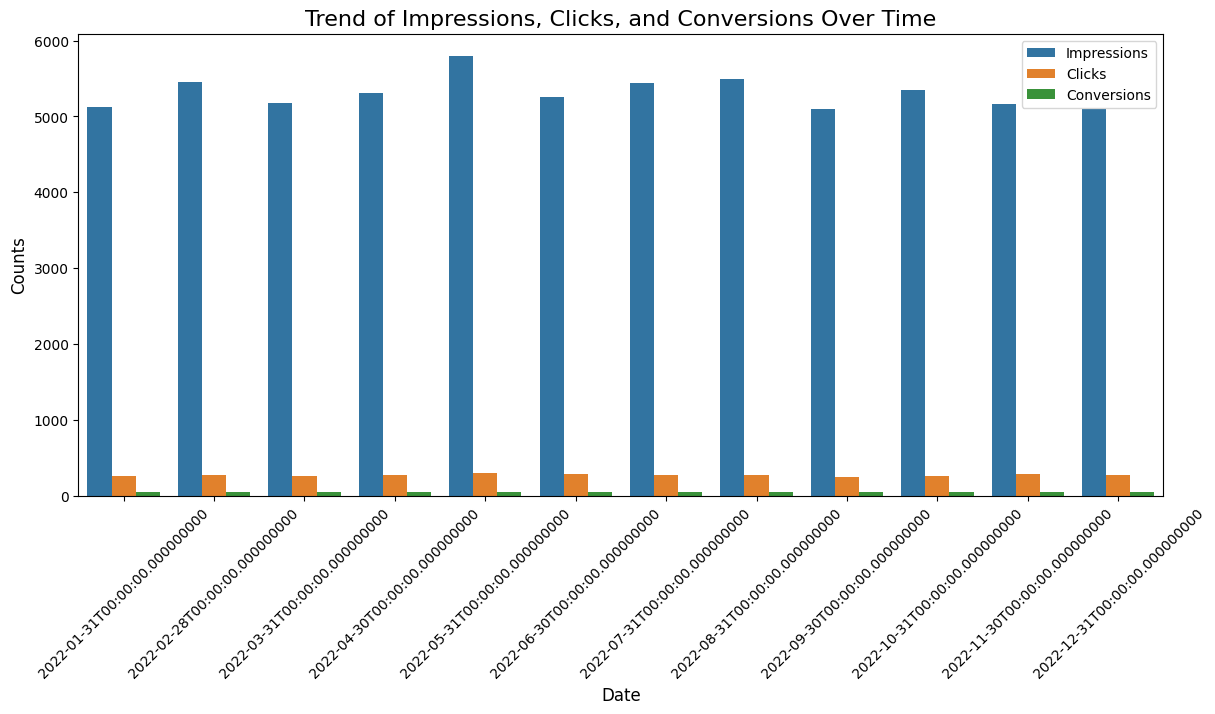

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape the data
sem_df_monthly_melted = sem_df_monthly.reset_index().melt(id_vars='Date', value_vars=['Impressions', 'Clicks', 'Conversions'])

# Set the figure size
plt.figure(figsize=(14, 6))

# Stacked bar plot
sns.barplot(x="Date", y="value", hue="variable", data=sem_df_monthly_melted, ci=None)

# Set the title and labels
plt.title("Trend of Impressions, Clicks, and Conversions Over Time", size=16)
plt.xlabel("Date", size=12)
plt.ylabel("Counts", size=12)
plt.xticks(rotation=45)

# Display the legend and plot
plt.legend()
plt.show()


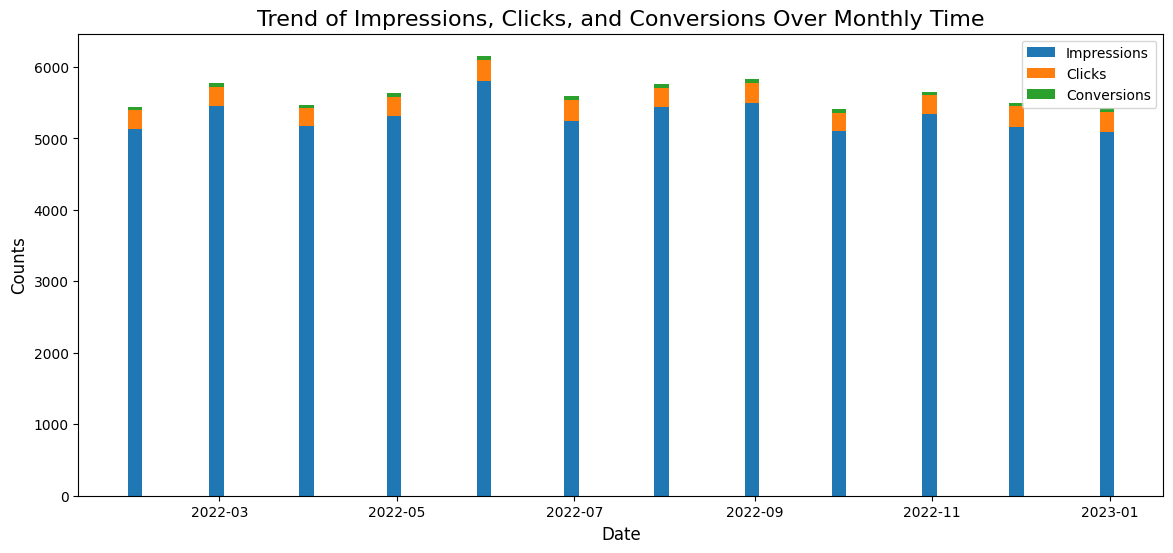

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(14, 6))

# Create a stacked bar plot
plt.bar(sem_df_monthly.index, sem_df_monthly["Impressions"], label='Impressions', width=5)
plt.bar(sem_df_monthly.index, sem_df_monthly["Clicks"], bottom=sem_df_monthly["Impressions"], label='Clicks', width=5)
plt.bar(sem_df_monthly.index, sem_df_monthly["Conversions"], bottom=sem_df_monthly["Impressions"] + sem_df_monthly["Clicks"], label='Conversions', width=5)

# Set the title and labels
plt.title("Trend of Impressions, Clicks, and Conversions Over Monthly Time", size=16)
plt.xlabel("Date", size=12)
plt.ylabel("Counts", size=12)

# Display the legend and plot
plt.legend()
plt.show()


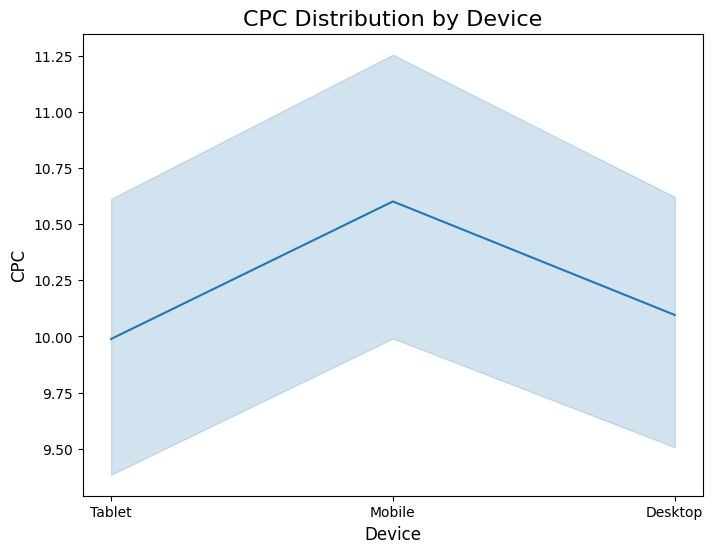

In [ ]:
# Create a new column for Cost Per Click
sem_df['CPC'] = sem_df['Cost'] / sem_df['Clicks']

# Set the figure size
plt.figure(figsize=(8, 6))

# Boxplot of CPC by device
sns.lineplot(x="Device", y="CPC", data=sem_df)

# Set the title and labels
plt.title("CPC Distribution by Device", size=16)
plt.xlabel("Device", size=12)
plt.ylabel("CPC", size=12)

# Display the plot
plt.show()


In [230]:
# Group by Keyword and calculate sum
keyword_performance = sem_df.groupby('Keyword').mean()

# Sort by Conversions and display the top 10 keywords
top_keywords = keyword_performance.sort_values('Conversions', ascending=False).head(10)

print(top_keywords)


            Impressions      Clicks  Conversions        CPC       CTR  \
Keyword                                                                 
Keyword_20  6137.043478  285.347826    63.652174  10.547787  0.071694   
Keyword_19  4528.900000  295.400000    61.250000   9.549187  0.080177   
Keyword_15  4989.076923  200.076923    59.384615   9.882102  0.057239   
Keyword_39  5958.950000  246.050000    58.500000   8.752209  0.054333   
Keyword_43  4413.625000  252.062500    58.312500   9.425071  0.097463   
Keyword_50  3922.222222  270.000000    58.277778   9.475431  0.115547   
Keyword_37  5730.961538  269.923077    58.269231  11.201146  0.083098   
Keyword_28  4630.333333  258.523810    57.857143  12.549812  0.109172   
Keyword_29  5625.894737  306.894737    57.684211  11.378382  0.096007   
Keyword_27  5081.250000  208.900000    57.150000  10.504953  0.081151   

            Conversion Rate         Cost  ROAS  ROAS2  
Keyword                                                
Keyword_20 

In [234]:
print(sem_df['Conversions'].sum())

50872


In [244]:
# Assume a constant value for revenue per conversion
revenue_per_conversion = 150

# Calculate ROAS for each keyword
keyword_performance ['ROAS'] = keyword_performance['Conversions'] * revenue_per_conversion / keyword_performance['Cost']

# Display the top 10 keywords by ROAS
top_roas_keywords = keyword_performance.sort_values('ROAS', ascending=False).head(10)

# Display the bottom 10 keywords by ROAS
bottom_roas_keywords = keyword_performance.sort_values('ROAS', ascending=True).head(10)



In [259]:
sorted_keyword_performance = keyword_performance.sort_values('ROAS', ascending=False)
sorted_keyword_performance['ROAS'].value_counts(bins=5)


(2.247, 2.864]    22
(2.864, 3.48]     11
(1.627, 2.247]     7
(3.48, 4.097]      5
(4.097, 4.713]     5
Name: ROAS, dtype: int64

In [270]:
top_increase_opportunities = keyword_performance.sort_values(['ROAS', 'CTR'], ascending=[False, True])
print(top_increase_opportunities.head(10))

            Impressions      Clicks  Conversions        CPC       CTR  \
Keyword                                                                 
Keyword_3   5960.375000  193.625000    54.750000  10.604957  0.050548   
Keyword_45  5176.714286  233.500000    53.928571   8.368888  0.048814   
Keyword_43  4413.625000  252.062500    58.312500   9.425071  0.097463   
Keyword_39  5958.950000  246.050000    58.500000   8.752209  0.054333   
Keyword_27  5081.250000  208.900000    57.150000  10.504953  0.081151   
Keyword_15  4989.076923  200.076923    59.384615   9.882102  0.057239   
Keyword_44  5853.850000  279.200000    53.550000   8.502317  0.065410   
Keyword_5   5384.058824  231.235294    55.941176   9.394253  0.070268   
Keyword_50  3922.222222  270.000000    58.277778   9.475431  0.115547   
Keyword_10  6133.714286  300.952381    51.571429   7.567473  0.090554   

            Conversion Rate         Cost      ROAS  
Keyword                                             
Keyword_3        

In [273]:
reduce_or_pause = keyword_performance.sort_values(['ROAS', 'CTR'], ascending=[True, False])
print(reduce_or_pause.head(10))

            Impressions      Clicks  Conversions        CPC       CTR  \
Keyword                                                                 
Keyword_49  4826.150000  319.450000    42.750000  12.274947  0.145336   
Keyword_46  5559.095238  259.047619    40.523810  12.589717  0.090121   
Keyword_40  6649.388889  308.277778    48.500000  12.291012  0.058956   
Keyword_13  4968.272727  270.227273    40.090909  10.359235  0.086944   
Keyword_22  4936.666667  304.466667    36.133333   8.286041  0.101073   
Keyword_18  4478.894737  257.052632    45.052632  11.609175  0.123041   
Keyword_47  6173.818182  321.000000    52.954545  11.706173  0.082551   
Keyword_7   5768.761905  244.380952    40.047619  10.597856  0.067805   
Keyword_34  4958.750000  315.150000    52.500000  10.613222  0.092266   
Keyword_14  4400.250000  304.437500    48.312500  10.114751  0.138842   

            Conversion Rate         Cost      ROAS  
Keyword                                             
Keyword_49       

In [314]:
recommendations = []
for row in keyword_performance['ROAS']:
  if row >= 3:
    recommendations.append(str("Increase"))
  elif row >= 2.5:
    recommendations.append(str("Hold"))
  else:
    recommendations.append(str("Reduce"))
print(recommendations)
keyword_performance['Recommendations'] = recommendations

['Hold', 'Increase', 'Hold', 'Hold', 'Reduce', 'Reduce', 'Increase', 'Increase', 'Increase', 'Reduce', 'Increase', 'Reduce', 'Increase', 'Reduce', 'Reduce', 'Hold', 'Increase', 'Hold', 'Hold', 'Increase', 'Hold', 'Hold', 'Increase', 'Increase', 'Reduce', 'Hold', 'Reduce', 'Reduce', 'Hold', 'Hold', 'Hold', 'Hold', 'Increase', 'Reduce', 'Reduce', 'Hold', 'Reduce', 'Increase', 'Increase', 'Increase', 'Reduce', 'Reduce', 'Hold', 'Reduce', 'Increase', 'Increase', 'Hold', 'Reduce', 'Increase', 'Reduce']


In [315]:
keyword_performance.sort_values(['ROAS', 'CTR'], ascending=[False, True]).head(10)

,Impressions,Clicks,Conversions,CPC,CTR,Conversion Rate,Cost,ROAS,Recommendations
Keyword,,,,,,,,,
Keyword_3,5960.375000,193.625000,54.750000,10.604957,0.050548,0.398711,1742.437752,4.713224,Increase
Keyword_45,5176.714286,233.500000,53.928571,8.368888,0.048814,0.365377,1749.101911,4.624822,Increase
Keyword_43,4413.625000,252.062500,58.312500,9.425071,0.097463,0.319132,2037.706245,4.292510,Increase
Keyword_39,5958.950000,246.050000,58.500000,8.752209,0.054333,0.346463,2090.205790,4.198151,Increase
Keyword_27,5081.250000,208.900000,57.150000,10.504953,0.081151,0.367061,2060.677055,4.160040,Increase
Keyword_15,4989.076923,200.076923,59.384615,9.882102,0.057239,0.313867,2236.611383,3.982673,Increase
Keyword_44,5853.850000,279.200000,53.550000,8.502317,0.065410,0.229993,2048.630760,3.920912,Increase
Keyword_5,5384.058824,231.235294,55.941176,9.394253,0.070268,0.328445,2327.068186,3.605901,Increase
Keyword_50,3922.222222,270.000000,58.277778,9.475431,0.115547,0.288016,2501.580707,3.494457,Increase


In [316]:
keyword_performance.sort_values(['ROAS', 'CTR'], ascending=[False, True]).tail(10)

,Impressions,Clicks,Conversions,CPC,CTR,Conversion Rate,Cost,ROAS,Recommendations
Keyword,,,,,,,,,
Keyword_14,4400.250000,304.437500,48.312500,10.114751,0.138842,0.241755,3106.845889,2.332551,Reduce
Keyword_34,4958.750000,315.150000,52.500000,10.613222,0.092266,0.163444,3397.692862,2.317749,Reduce
Keyword_7,5768.761905,244.380952,40.047619,10.597856,0.067805,0.202193,2595.527832,2.314421,Reduce
Keyword_47,6173.818182,321.000000,52.954545,11.706173,0.082551,0.179718,3623.010434,2.192426,Reduce
Keyword_18,4478.894737,257.052632,45.052632,11.609175,0.123041,0.243607,3116.355787,2.168525,Reduce
Keyword_22,4936.666667,304.466667,36.133333,8.286041,0.101073,0.143972,2552.094193,2.123746,Reduce
Keyword_13,4968.272727,270.227273,40.090909,10.359235,0.086944,0.199429,2846.964597,2.112298,Reduce
Keyword_40,6649.388889,308.277778,48.500000,12.291012,0.058956,0.254686,3626.958731,2.005813,Reduce
Keyword_46,5559.095238,259.047619,40.523810,12.589717,0.090121,0.261235,3140.626826,1.935464,Reduce
